# Paper Re-implementation
Trying to match the authors as much as possible

## Data

In [1]:
from src.image_generator import generate_images
import matplotlib.pyplot as plt

pygame 2.0.0.dev6 (SDL 2.0.10, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
data_generator = generate_images(object_types=[
        'ellipse',
        'checkerboard',
        'cube',
        'quad',
        #'star', # buggy
        'line',
        'triangle',
        'none'], 
    batch_size=32, 
    object_count=2, 
    display_mode=1,
    shape = (160,120),
    single_channel=True)

In [3]:
x,y = next(data_generator)

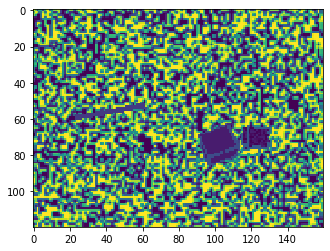

In [4]:
plt.imshow(x[0].reshape(120,160))

In [5]:
x[0].shape

(160, 120, 1)

## Model

In [6]:
import keras
from keras.layers import Activation, Conv2D, Lambda, BatchNormalization, ZeroPadding2D, MaxPooling2D
from keras.activations import softmax
import tensorflow as tf

Using TensorFlow backend.


In [7]:
model = keras.models.Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(160,120,1)))
model.add(Conv2D(16,3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64,3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(32,3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(32,3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64,3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64,3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(65,1, activation='softmax'))
model.add(Lambda(lambda x: x[:,:,:,:-1]))
model.add(Lambda(lambda x: tf.nn.depth_to_space(x, block_size=8)))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 162, 122, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 120, 16)      160       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 162, 122, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 120, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 60, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 60, 64)        256       
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 82, 62, 64)       

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras.metrics.MeanIoU(num_classes=2)])

In [10]:
model.fit(data_generator, steps_per_epoch=8, epochs=10)

Epoch 1/10
8/8 [==============================] - 48s 6s/step - loss: 0.0165 - mean_io_u: 0.4998
Epoch 2/10
8/8 [==============================] - 47s 6s/step - loss: 0.0138 - mean_io_u: 0.4998
Epoch 3/10
8/8 [==============================] - 47s 6s/step - loss: 0.0137 - mean_io_u: 0.4997
Epoch 4/10
8/8 [==============================] - 47s 6s/step - loss: 0.0117 - mean_io_u: 0.4997
Epoch 5/10
8/8 [==============================] - 47s 6s/step - loss: 0.0108 - mean_io_u: 0.4997
Epoch 6/10
8/8 [==============================] - 47s 6s/step - loss: 0.0101 - mean_io_u: 0.4997
Epoch 7/10
8/8 [==============================] - 47s 6s/step - loss: 0.0107 - mean_io_u: 0.4997
Epoch 8/10
8/8 [==============================] - 47s 6s/step - loss: 0.0085 - mean_io_u: 0.4997
Epoch 9/10
8/8 [==============================] - 47s 6s/step - loss: 0.0094 - mean_io_u: 0.4997
Epoch 10/10
8/8 [==============================] - 47s 6s/step - loss: 0.0089 - mean_io_u: 0.4997


In [12]:
x,y = next(data_generator)

In [15]:
y_hat = model.predict(x)

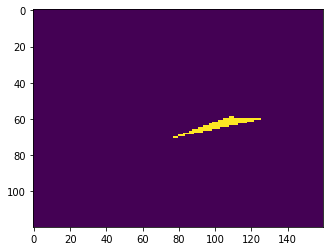

In [14]:
plt.imshow(x[0].reshape(120,160))

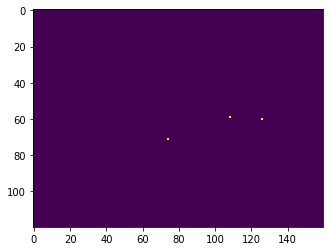

In [16]:
plt.imshow(y[0].reshape(120,160))

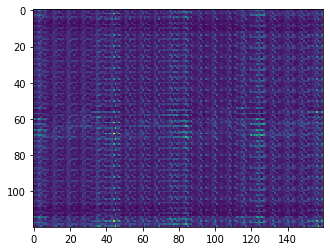

In [25]:
plt.imshow(y_hat[0].reshape(120,160))